In [ ]:
# Problem Statement : 

Example 
# To detect probability of defaulter rate well in advance using ML based analysis 
# We were trying to find out capabilty of candidature that he will be a good customer or not in future 

Problem Statement :
We are trying to find out if customer is happy or not with new product if not then what are reasons behind it 

#Data Extraction :
 1.pdf ---> py2pdf 
 2. images ----> pytesseract,opencv 
 3. json -----> json --dump load 
 4. webscrapping 
 5.Api ---> download 

 Questions :
 1. Problems faced while extracting data 
 2. What is ustructured data ? How you unstructured format into structured format ?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd 
data = pd.read_csv(r"/content/drive/MyDrive/dataset/dataset_es_train.csv")
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


In [2]:
data = data[['review_body','stars']]
data.head(2)

,review_body,stars
0,Nada bueno se me fue ka pantalla en menos de 8...,1
1,"Horrible, nos tuvimos que comprar otro porque ...",1


In [4]:
!pip install langdetect 
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=8110259914137ae820eb94bd642975c1104630d08d23562445a9f01d5044e07f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 1.4 MB 10.1 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=08b0506ab6736007995dbfb2ba12815f82d1d49b01d4f368367d7ed67b84cacd
  Sto

In [37]:
# importing libraries
from langdetect import detect
from googletrans import Translator
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt 
from string import punctuation 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import contractions 
import unidecode 
import re 
from yellowbrick.cluster import SilhouetteVisualizer

In [5]:
!pip install contractions
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 5.2 MB/s 
     |████████████████████████████████| 287 kB 43.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.2 MB/s 


In [5]:
data.shape

(200000, 2)

In [9]:
final_data = data.sample(1000)

In [10]:
final_data.reset_index(drop=True,inplace=True)

In [27]:
def lang_detect(data):
  lang = detect(data)
  return lang

In [13]:
lang_detect(final_data.review_body[1])

'es'

In [28]:
final_data['language_detected'] = final_data.review_body.apply(lang_detect)

In [15]:
final_data.head(2)

,review_body,stars,language_detected
0,Nada bueno se me fue ka pantalla en menos de 8...,1,es
1,"Horrible, nos tuvimos que comprar otro porque ...",1,es


In [7]:
def lang_trans(data):
  tranlator = Translator()
  trans_data = tranlator.translate(data)
  return trans_data.text

In [17]:
lang_trans(final_data.review_body[1])

'Horrible, we had to buy another one because neither we who know English, nor a computer technician, after an hour was able to install it'

In [11]:
final_data['Translated_review'] = final_data.review_body.apply(lang_trans)

In [ ]:
# EDA :
# to understand distribution of data 
# to get insights 

In [19]:
final_data.head(2)

,review_body,stars,language_detected,Translated_review
0,Nada bueno se me fue ka pantalla en menos de 8...,1,es,Nothing good the screen left me in less than 8...
1,"Horrible, nos tuvimos que comprar otro porque ...",1,es,"Horrible, we had to buy another one because ne..."


In [21]:
data.stars.unique()

array([1, 2, 3, 4, 5])

In [31]:
# create target column with other existing column
def sentiment_column(data):
  if data<3 :
    return 'Negative'
  elif data==3:
    return "Neutral"
  elif (data>3) :
    return "Positive"

In [35]:
final_data["Sentiment"]  = final_data.stars.apply(sentiment_column)

In [41]:
final_data

,review_body,stars,language_detected,Translated_review,Sentiment
0,Algunos puertos no funcionan bien,3,es,Some ports do not work well,Neutral
1,"Hola, me pone paquete entregado pero no lo he ...",1,es,"Hello, it says package delivered but I have no...",Negative
2,Libro entretenido pero nada del otro mundo,3,es,Entertaining book but nothing to write home about,Neutral
3,Se rompió la tapa al día siguiente de colocarl...,1,es,The cover broke the day after placing it on th...,Negative
4,ME DURA MENOS TIEMPO QUE LA BATERÍA ORIGINAL Q...,1,en,IT LASTS LESS TIME THAN THE ORIGINAL BATTERY I...,Negative
...,...,...,...,...,...
995,No me gusta la pantalla. Al hacer fotos no se ...,3,es,I don't like the screen. When taking photos yo...,Neutral
996,Tantas cosas de unicornio juntas la volvió loc...,4,es,So many unicorn things together made her crazy...,Positive
997,Nada que decir. El producto me parece correcto...,3,es,Nothing to say. The product seems correct to m...,Neutral
998,Uno de ellos se apagaba enseguida y se conecta...,1,es,One of them turned off immediately and connect...,Negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


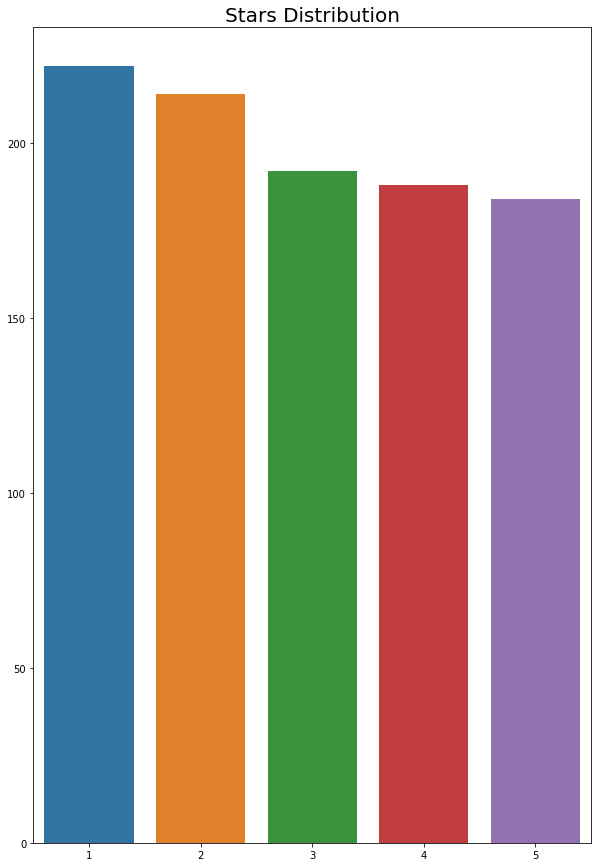

In [34]:
# barplot distribution for stars
x_rating = final_data.stars.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(10,15))
sns.barplot(x_rating.index,x_rating.values)
plt.title("Stars Distribution",fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


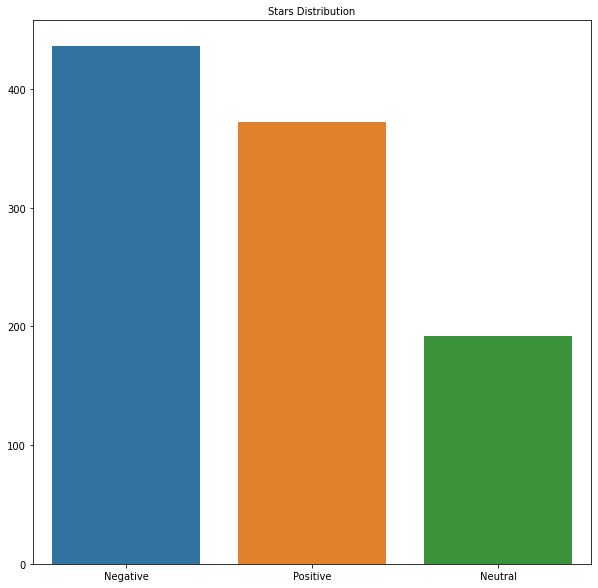

In [37]:
x_rating = final_data.Sentiment.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(10,10))
sns.barplot(x_rating.index,x_rating.values)
plt.title("Stars Distribution",fontsize=10)
plt.show()

In [60]:
def get_ngrams(df,column,ngram_range,n=None):
  """This function will give us ngrams and plot graph for ngrams"""
  cv = CountVectorizer(ngram_range=ngram_range,stop_words='english')
  bow = cv.fit_transform(df[column])
  sum_of_words = bow.sum(axis=0)
  
  word_freq = [(word,sum_of_words[0,i]) for word,i in cv.vocabulary_.items()]
  
  word_freq = sorted(word_freq,key= lambda x : x[1],reverse=True)

  df_ngrams = pd.DataFrame(word_freq[:n],columns = ['word','count'])
 
  fig,ax = plt.subplots(figsize=(20,20))
  plt.xticks(rotation='vertical')
  fig = sns.barplot(x='word',y='count',data =df_ngrams )
  plt.show()


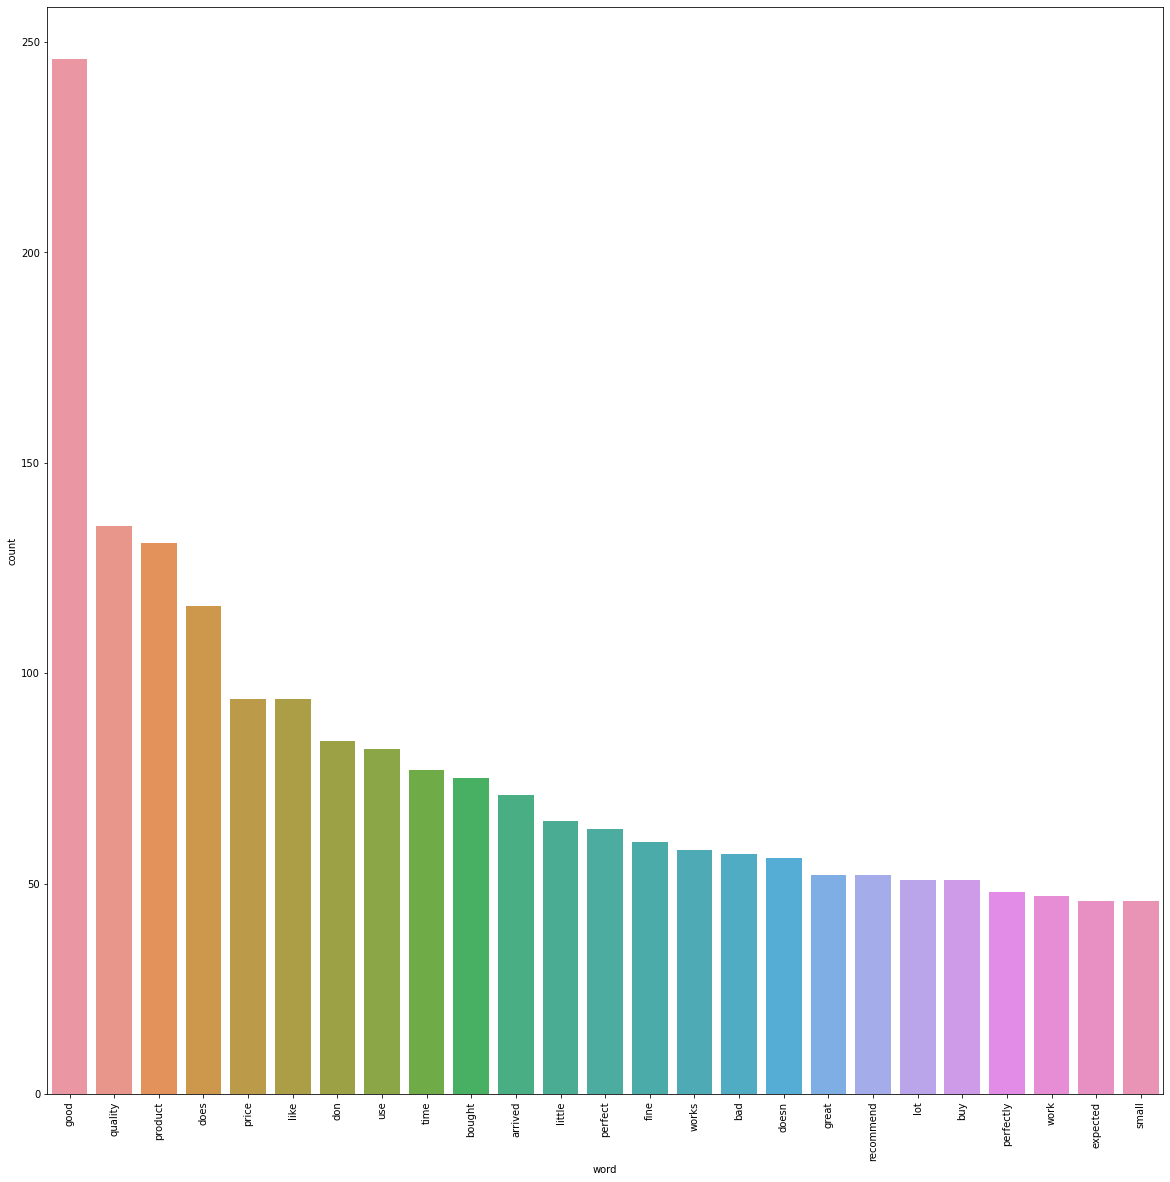

In [61]:
# unigrams
get_ngrams(final_data,"Translated_review",(1,1),25)


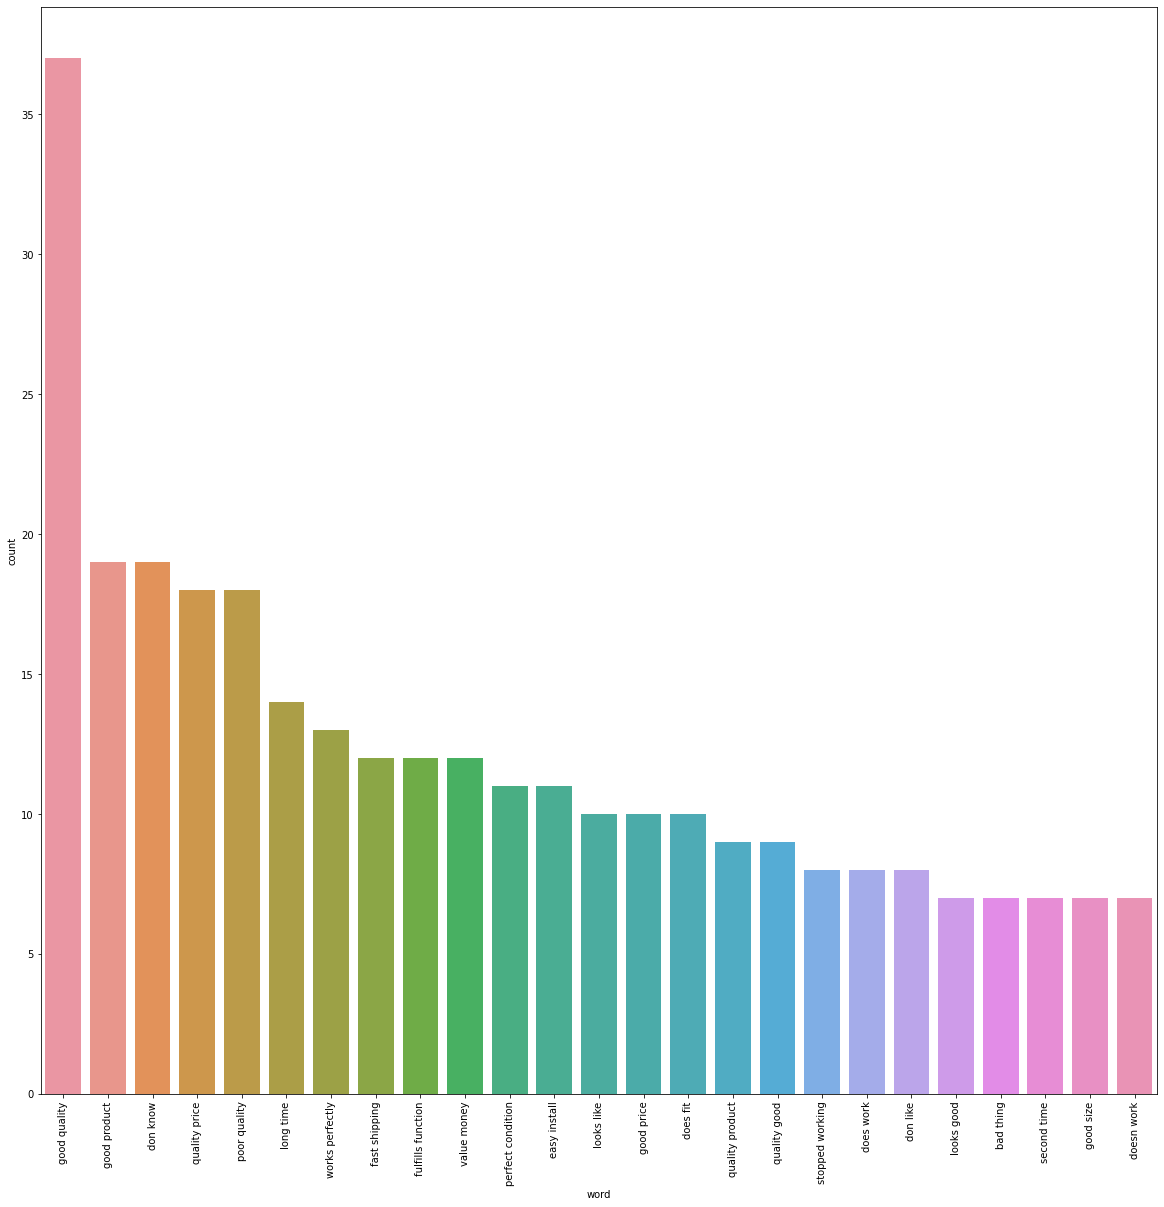

In [62]:
# bigrams
get_ngrams(final_data,"Translated_review",(2,2),25)


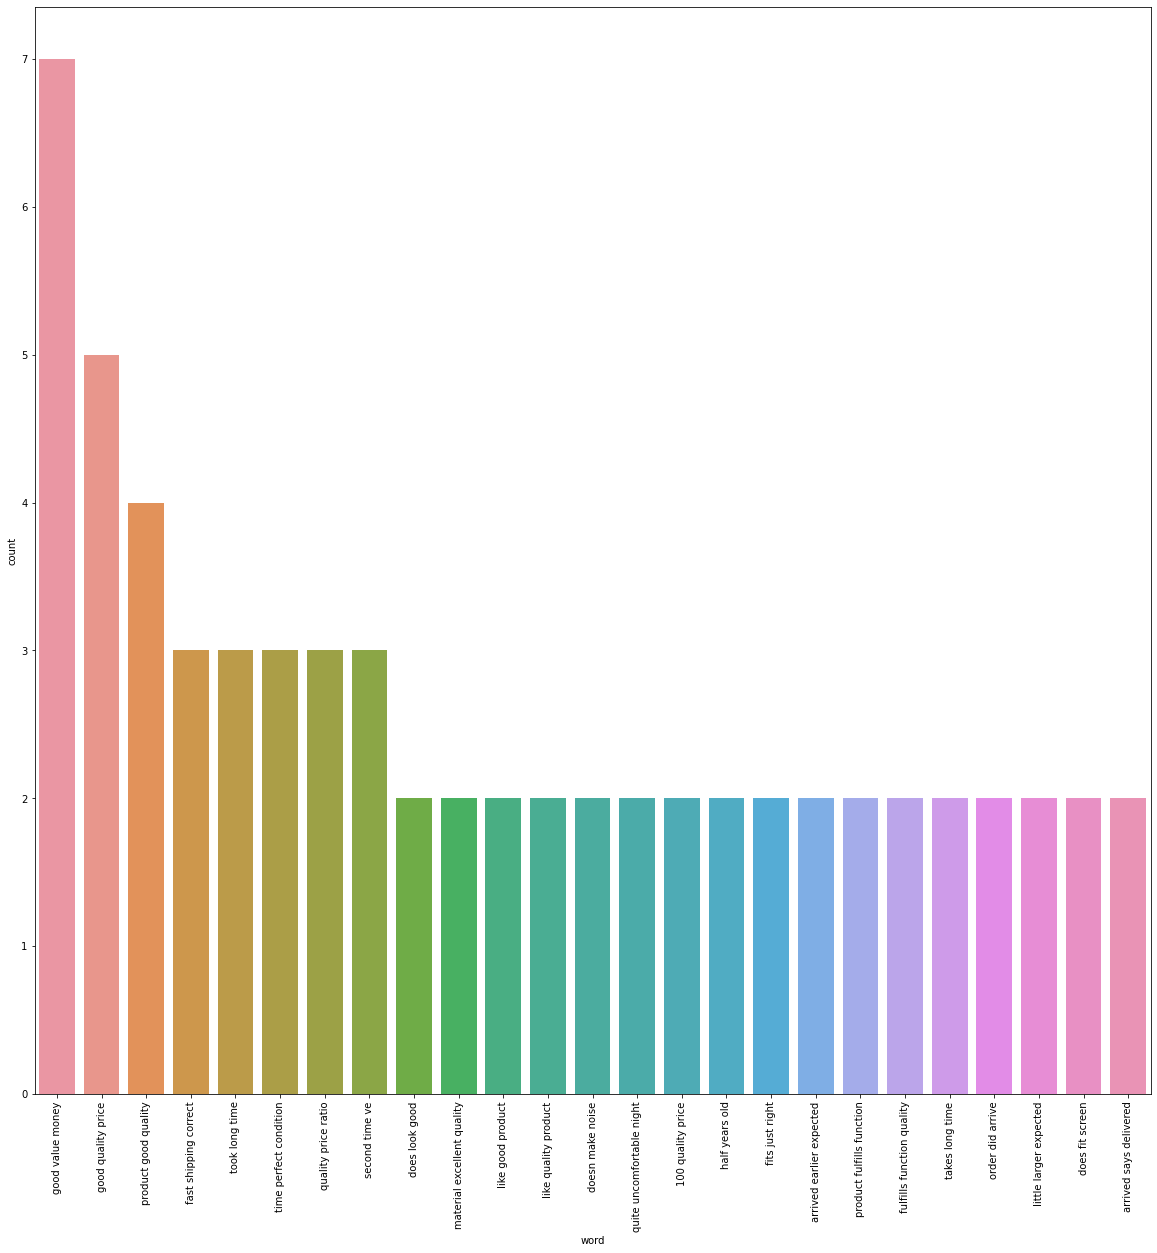

In [63]:
# Trigrams
get_ngrams(final_data,"Translated_review",(3,3),25)


In [65]:
def wordcloud(data,column):
  df = data[column].str.cat(sep=' ')
  text = " ".join([word for word in df.split() ])

  word_cloud = WordCloud(width=700,height=400,background_color='white',min_font_size=10).generate(text)
  plt.figure(figsize=(10,16))
  plt.imshow(word_cloud)
  plt.show()

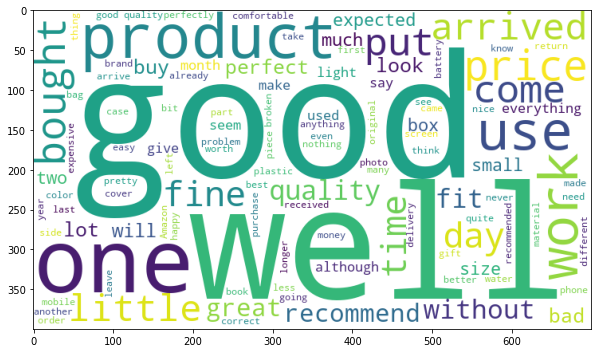

In [66]:
wordcloud(final_data,"Translated_review")


In [ ]:
 # ontology creation 
#  {"key":" velue"} : {"Poor Customer Service" :["customer service bad","bad customer service"]}

In [67]:
!pip install rake_nltk
!pip install yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 37.2 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73984 sha256=295717b243e90f48b3290a785234f9e426131382808c1ab57f5e1941b23d5420
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [74]:
from rake_nltk import Rake
text  = "SAARC is consist of south asian countries. India is supporting SAARC"
rak_keyphrases = Rake()
rak_keyphrases.extract_keywords_from_text(text)
keyphrases = rak_keyphrases.get_ranked_phrases()
print(keyphrases)

['south asian countries', 'supporting saarc', 'saarc', 'india', 'consist']


In [76]:
import yake 
# max_ngram_size = n : len of keyphrases : 3 : uni,bigram,trigram
yake_keywords = yake.KeywordExtractor(n=3,top=5)
keywords = yake_keywords.extract_keywords(text)
for i in keywords:
  print(i)

('south asian countries', 0.01025390983179928)
('asian countries', 0.038712704770480444)
('consist of south', 0.06293003982763552)
('south asian', 0.06293003982763552)
('SAARC', 0.12817594065136526)


In [77]:
def yake_extractor(data):
  keyword_extractor = yake.KeywordExtractor()
  keywords = keyword_extractor.extract_keywords(data)
  keywords_list = []
  for kw in keywords:
    keywords_list.append(kw[0])
  return keywords_list

In [78]:
keywords = final_data.Translated_review.apply(yake_extractor)


In [81]:
all_keywords = []
for i in keywords:
  all_keywords.extend(i)
cnt= Counter(all_keywords)
cnt

Counter({'ports': 4,
         'work': 39,
         'package delivered': 1,
         'package': 14,
         'delivered': 10,
         'received': 23,
         'Entertaining book': 1,
         'write home': 1,
         'Entertaining': 1,
         'book': 15,
         'write': 3,
         'home': 12,
         'cover broke': 1,
         'broke the day': 1,
         'day after placing': 1,
         'mobile': 25,
         'cover': 24,
         'broke': 13,
         'day': 28,
         'placing': 2,
         'disaster': 5,
         'ORIGINAL BATTERY': 1,
         'DURATION PROBLEM': 1,
         'PREVIOUSLY': 1,
         'SOLVED THE DURATION': 1,
         'TIME': 2,
         'ORIGINAL': 2,
         'BATTERY': 1,
         'CHEERS': 1,
         'PROBLEM': 1,
         'SOLVED': 1,
         'DURATION': 1,
         'Bag with Nordic': 1,
         'Nordic filling': 1,
         'canine patrol': 1,
         'kids Recommendable': 1,
         'Nordic': 1,
         'Bag': 1,
         'patrol': 1,
       

In [ ]:
root cause analysis 
1. ontology creation
{'root cause':['customer service is not good','bad customer service'],'poor communication':}

"I bought this product last week, but I am not happy with customer service " : "Poor customer service "


1. customer is happy or not 
2. root cause analysis : if customer is not happy what is reason behind it 



keyphrases ---> root causes : manually find out which are similar root causes ----> ontology 



In [ ]:
# clustering  

if we do not have labelled data for sentiment analysis 

1. KMeans  1 KMeans with count vectorizer 
           2. KMeans with TFIDF 
          3. Kmeans with word2vec 

2. Hierarchical : 1. Count 
                  2.  TFIDF 
                  3. word2vec 


evaluate : visualize sihloutte score 

In [14]:
# Preprocessing 
def remove_newline(data):
    clean_text = data.replace("\\n",' ').replace("\n",' ').replace('\t',' ').replace('\\',' ')
    return clean_text
def remove_whitespace(data):
    pattern = re.compile(r'\s+')
    without_whitespace =  re.sub(pattern,' ',data)
    return without_whitespace
def remove_accented_character(data):
    text  = unidecode.unidecode(data)
    return text 
def contraction_mapping(data):
    tokens = data.split()
    expanded_words = []
    for word in tokens :
        expanded_words.append(contractions.fix(word))
    expanded_text = " ".join(expanded_words)
    return expanded_text
stop = stopwords.words('english')
stop.remove('no')
stop.remove('nor')
stop.remove(
 'not')
def clean_data(data):
    tokens = RegexpTokenizer(r'\w+').tokenize(data)
    text_without_stop = [word for word in tokens if word not in stop]
    final_text = []
    for word in text_without_stop :
        if (len(word)<2) or ( word in punctuation) :
            pass 
        else :
            final_text.append(word)
    text = " ".join(final_text)
    return text
def lemmatization(data):
    tokens = word_tokenize(data)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    lemma = WordNetLemmatizer()
    final_text =[]
    for i in tokens:
        lemmatized_word = lemma.lemmatize(i)
        final_text.append(lemmatized_word)
    return " ".join(final_text)
       

In [20]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [21]:
clean_text = final_data.Translated_review.apply(remove_newline)
clean_text = clean_text.apply(remove_whitespace)
clean_text = clean_text.apply(remove_accented_character)
clean_text = clean_text.apply(contraction_mapping)
clean_text = clean_text.apply(clean_data)
clean_text = clean_text.apply(lemmatization)


In [98]:
clean_text

0                                some port not work well
1               hello say package delivered not received
2                   entertaining book nothing write home
3            the cover broke day placing mobile disaster
4      it last le time than the original battery had ...
                             ...                        
995    not like screen when taking photo can not see ...
996        so many unicorn thing together made crazy lol
997    nothing say the product seems correct she arri...
998    one turned immediately connected wanted return...
999    it broke month little use internal element low...
Name: Translated_review, Length: 1000, dtype: object

In [22]:
# Text Vectorization 

# Count vectorizer 

count_vec = CountVectorizer()
bow = count_vec.fit_transform(clean_text).A

# TFIDF 
tfidf = TfidfVectorizer()
tfidf_val =tfidf.fit_transform(clean_text).A



In [23]:
# w1,w2,w3 =avg

# final_text =  [[w1,w2],[w1,w2,w3]]


clean_text_list = clean_text.tolist()
splitted_sent = [sent.split() for sent in clean_text_list]


In [24]:
splitted_sent[0]

['not', 'like', 'look', 'bad', 'worth', 'dissatisfied']

In [25]:
# build word2vec
word2vec_model = Word2Vec(splitted_sent,min_count=1,window=3)
word2vec_model.save('word2vec.model')

In [26]:
import numpy as np
def vectorize(splitted_sent,model):
  feature = [] # append vector of sentence 
  for tokens in splitted_sent : # iterarate splitted_sent
    zero_vector = np.zeros(model.vector_size) # if vector not available return zero vector
    vector = [] # saving vector of each word
    for token in tokens : # iterate over words in each sentence example ['some', 'port', 'not', 'work', 'well']
      if token in model.wv: # checking if word available or not in vocabulary
        try : 
          vector.append(model.wv[token])# appending vector  
        except KeyError :
          continue
    if vector: # get avarage of all vectors( w1 : vec1 ,w2 : vec2 ,w3 : vec3)
      vector = np.asarray(vector)
      avg_vec = vector.mean(axis=0)
      feature.append(avg_vec)
    else:
      feature.append(zero_vector)
  return feature


vectorized_documents = vectorize(splitted_sent,word2vec_model)


In [27]:
len(splitted_sent)

1000

In [28]:
X_emb = np.array(vectorized_documents) # converting all vectors into a single array

In [30]:
# KMeans Model
def kmeans(clusters,data):
  kmeans_model = KMeans(n_clusters=clusters)
  y_pred = kmeans_model.fit_predict(data)
  return kmeans_model,y_pred

In [35]:
# KMeans - Count vect
bow_kmeans_model,bow_kmeans_prediction = kmeans(3,bow)

In [32]:
#KMeans - TFIDF
tfidf_kmeans_model,tfidf_kmeans_prediction = kmeans(3,tfidf_val)

In [33]:
#KMeans - Word2vec
word2vec_kmeans_model,word2vec_kmeans_prediction = kmeans(3,X_emb)

In [36]:
#Evaluation KMeans 
print(f"Silhoutte score kmeans-bow : {silhouette_score(bow,bow_kmeans_prediction)}")
print(f"Silhoutte score kmeans-tfidf : {silhouette_score(tfidf_val,tfidf_kmeans_prediction)}")
print(f"Silhoutte score kmeans-word2vec : {silhouette_score(X_emb,word2vec_kmeans_prediction)}")

Silhoutte score kmeans-bow : 0.050134710173965674
Silhoutte score kmeans-tfidf : 0.006398554879212969
Silhoutte score kmeans-word2vec : 0.430972158908844


In [38]:
# visualize silhoutte score
def visualize_silhoutte_score(data,model,title):
  visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
  visualizer.fit(data)
  plt.title(f"Silhoutte score for {title}")

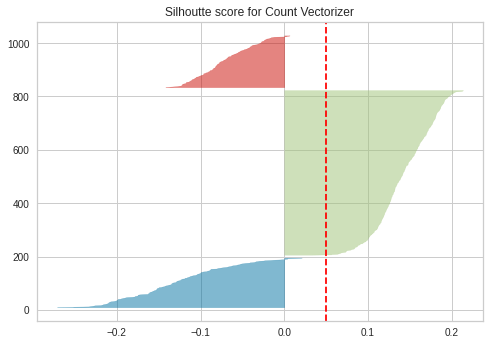

In [39]:
visualize_silhoutte_score(bow,bow_kmeans_model,"Count Vectorizer")

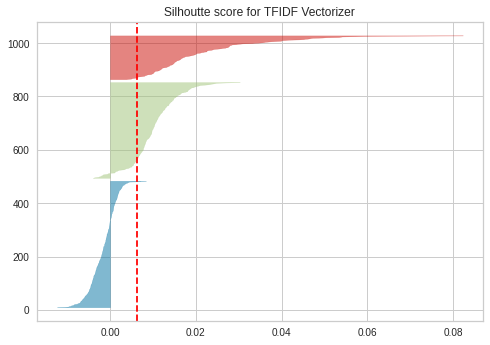

In [40]:
visualize_silhoutte_score(tfidf_val,tfidf_kmeans_model,"TFIDF Vectorizer")

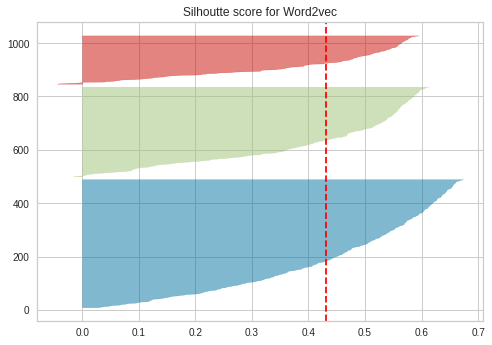

In [41]:
visualize_silhoutte_score(X_emb,word2vec_kmeans_model,"Word2vec")

In [ ]:
# Silhoutte score lies between -1 to +1
# change number of cluster 
# change clustering algo

In [ ]:
# Agglomerative Model
def agglomerative(clusters,data):
  agglomerative_model = AgglomerativeClustering(n_clusters=clusters,linkage="")
  y_pred = agglomerative_model.fit_predict(data)
  return agglomerative_model,y_pred

In [ ]:
# SOM Clustering

In [ ]:
# logistic regression
# dt classifier
#naive bayes 
# svm 
#  gb 
# xgb